# **CREDIT CARD FRAUD DETECTION**

### **Description**  
Its sole input variables are numbers that come from a PCA transformation. Regretfully, we are unable to offer the original features and further context for the data owing to privacy concerns. The major components obtained with PCA are features V1, V2,... V28. The only features that have not undergone PCA transformation are 'Time' and 'Amount'. The seconds that pass between each transaction and the dataset's initial transaction are contained in the feature "Time." The transaction amount is represented by the feature "Amount," which can be utilised for cost-sensitive learning based on examples. The response variable, 'Class', takes value 0 in the absence of fraud and 1 in the case of fraud.

![picture](https://drive.google.com/uc?export=view&id=1MTaD9YYInIohe4oUbHT7t25cHgW0orPZ)

Build a machine learning model to identify fraudulent credit card
transactions.
Preprocess and normalize the transaction data, handle class
imbalance issues, and split the dataset into training and testing sets.
Train a classification algorithm, such as logistic regression or random
forests, to classify transactions as fraudulent or genuine.
Evaluate the model'
s performance using metrics like precision, recall,
and F1-score, and consider techniques like oversampling or
undersampling for improving results.

In [1]:
import zipfile
zip_ref=zipfile.ZipFile('C:/Users/bobby/Downloads/Credit card.zip')
zip_ref.extractall('/content')
zip_ref.close()

### **Importing the Essential Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [3]:
!pip install datacleaner
!pip install fasteda


[notice] A new release of pip is available: 23.1.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from datacleaner import autoclean
from fasteda import fast_eda

### **Creating DataFrame**

In [6]:
df=pd.read_csv('C:/Users/bobby/Desktop/Technohacks Data Science Internship/Datasets/creditcard.csv')
s,k=df.shape
print('Number of Rows: ',s)
print('Number of Columns: ',k)

Number of Rows:  284807
Number of Columns:  31


### **Exploring the Dataset**

In [7]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### **Null Values in the Dataset**

In [10]:
# Checking for null value so that Data Impuation can be done
df.isnull().mean()*100

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

### **Creating New DataFrame in order to find Outliers**

In [11]:
df2=df.drop("Class",axis=1)

In [12]:
df2=autoclean(df2)
df2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


### **Duplicates in the New DataFrame**

In [13]:
k=df2.duplicated().sum()
print('Duplicates present in the dataset are: ',k)

Duplicates present in the dataset are:  1081


In [14]:
df2=df2.drop_duplicates()
print('Duplicates present in the dataset are: ',df2.duplicated().sum())

Duplicates present in the dataset are:  0


### **Outliers in the Dataset**  

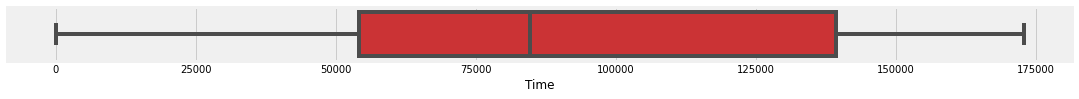

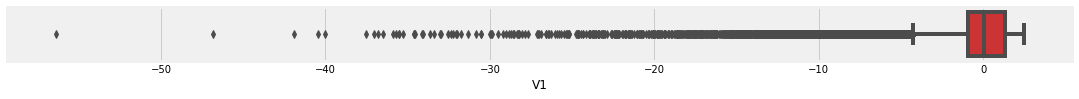

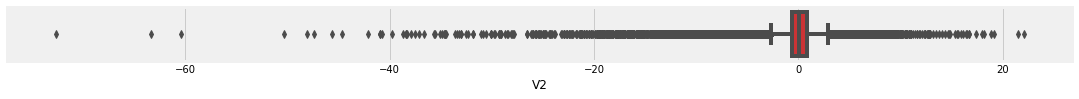

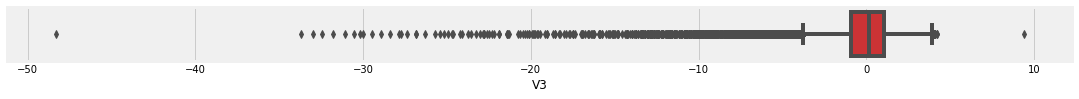

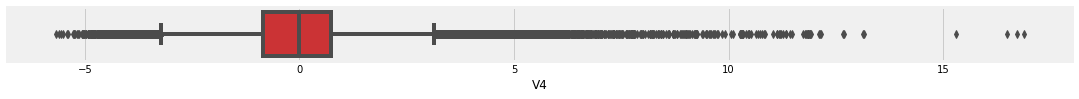

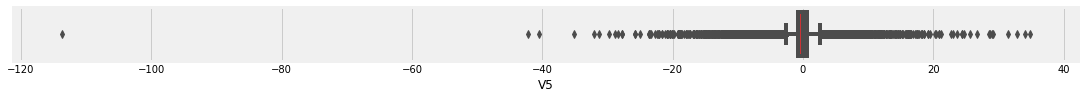

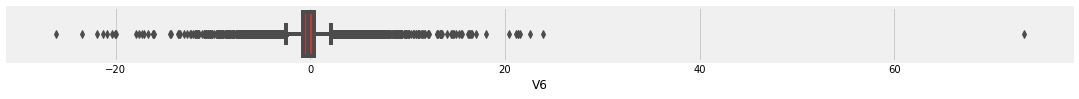

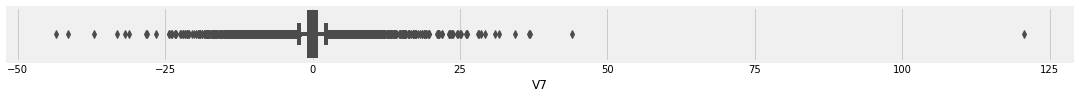

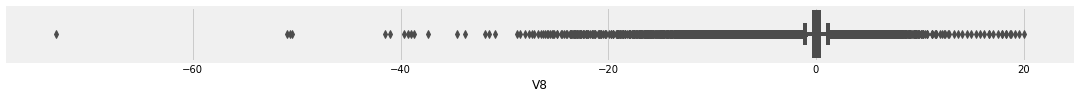

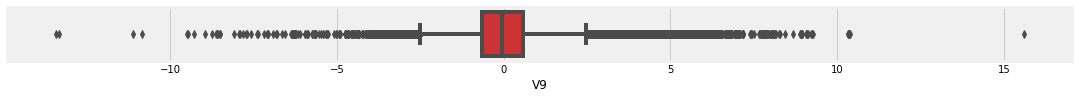

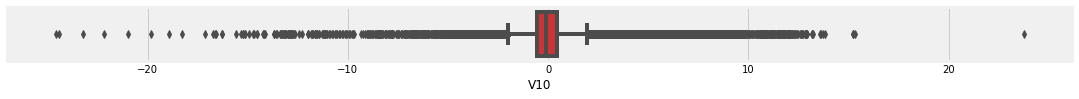

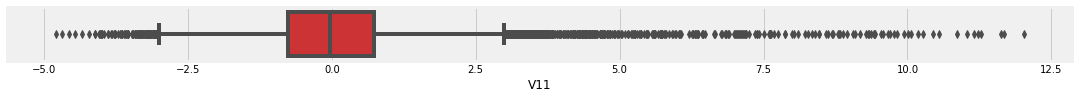

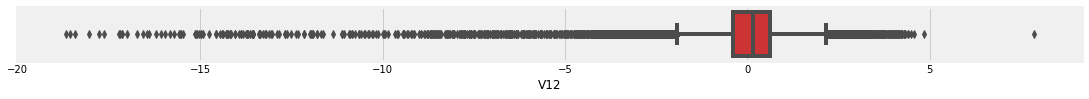

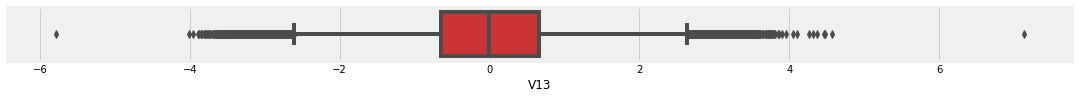

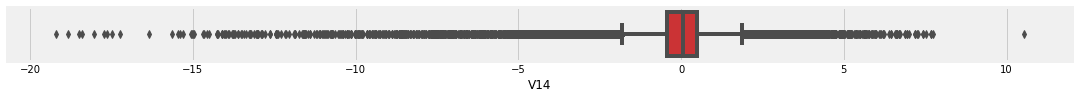

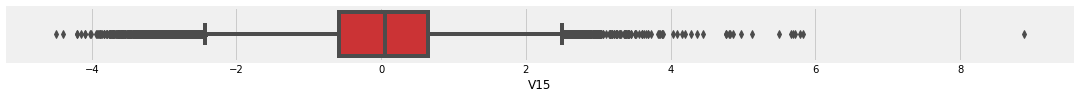

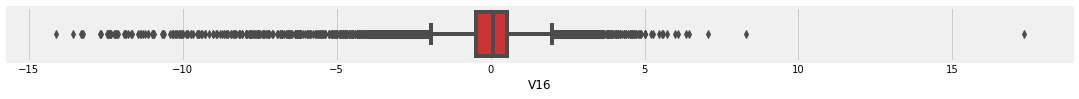

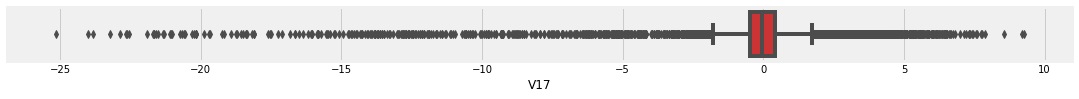

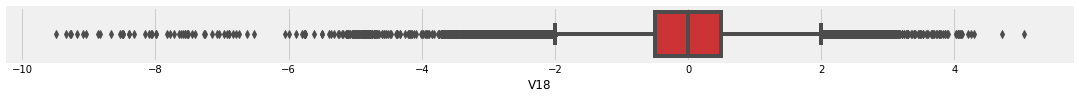

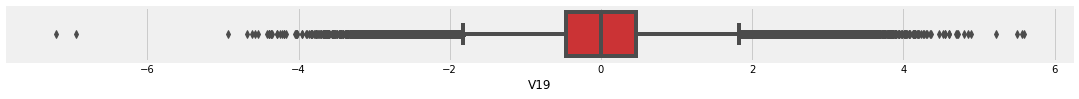

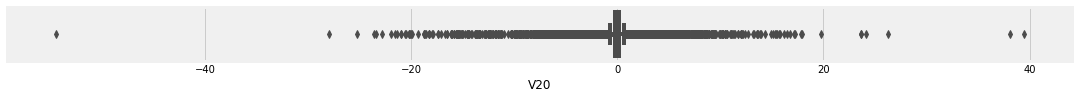

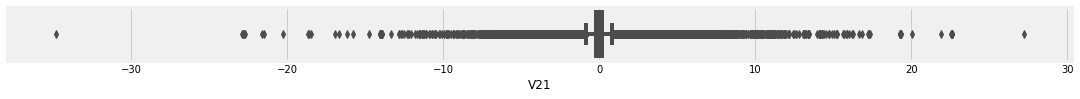

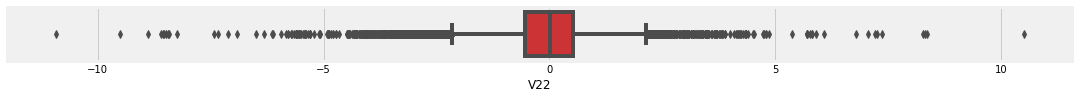

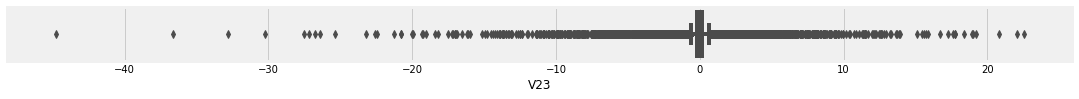

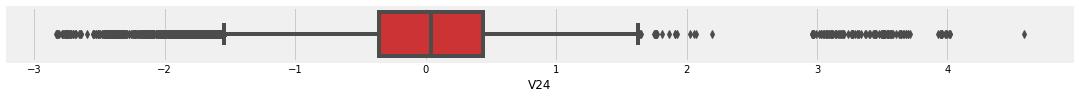

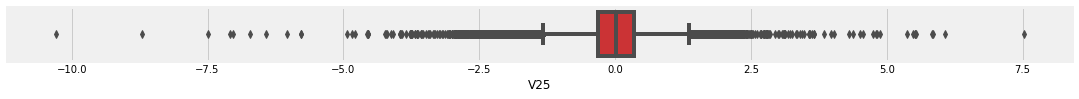

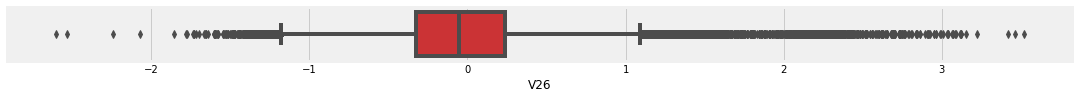

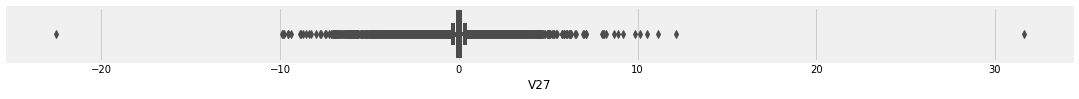

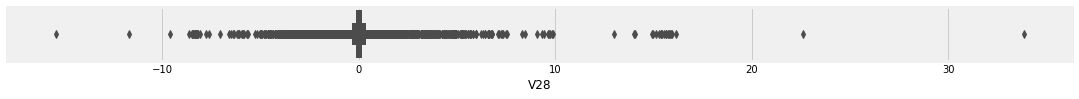

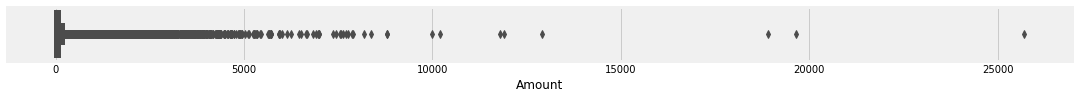

In [15]:
for col in df2:
        plt.figure(figsize=(17,1))
        sns.boxplot(data = df2, x=col,palette='Set1')
plt.show()

### **Normalising the Outlier**

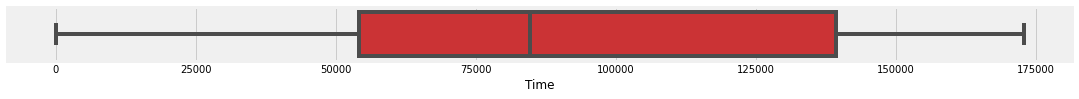

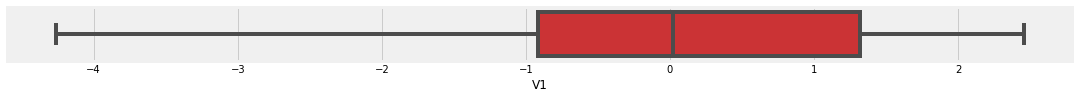

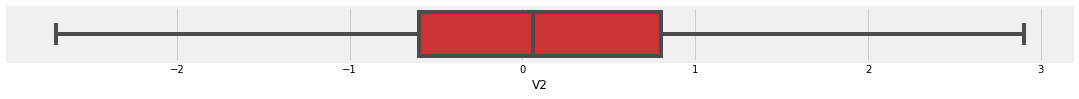

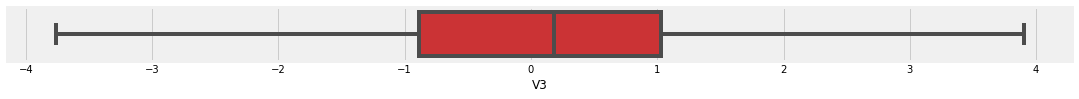

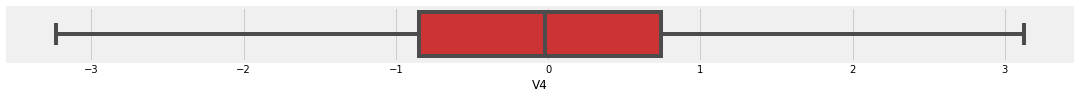

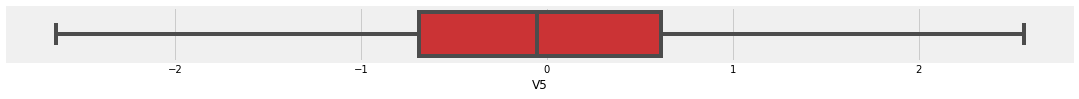

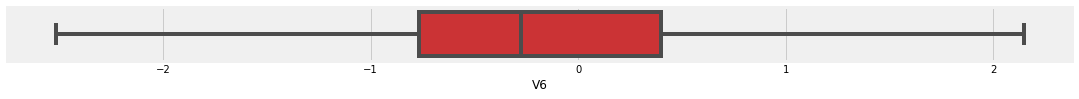

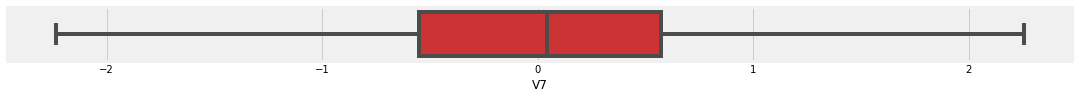

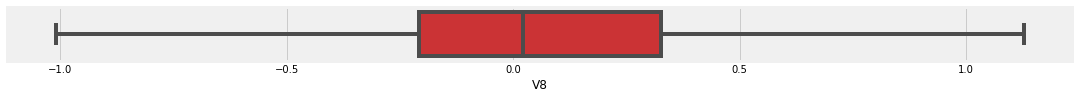

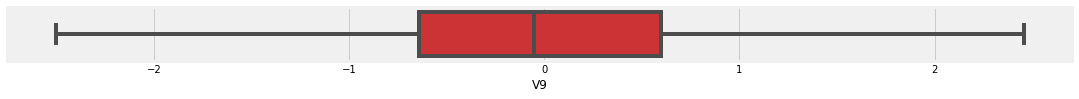

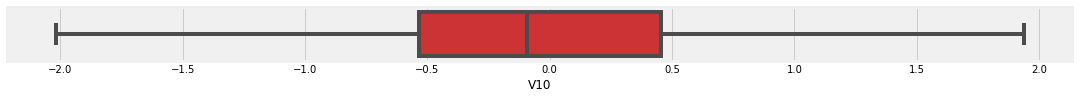

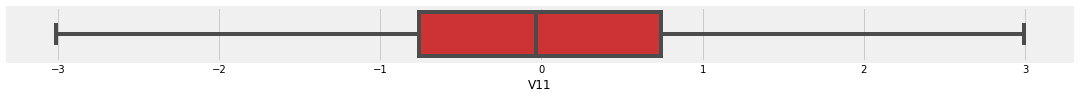

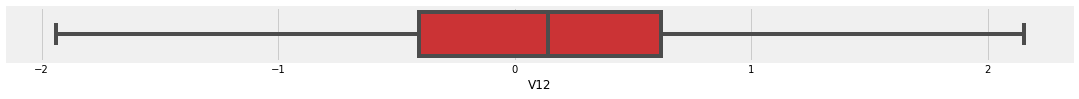

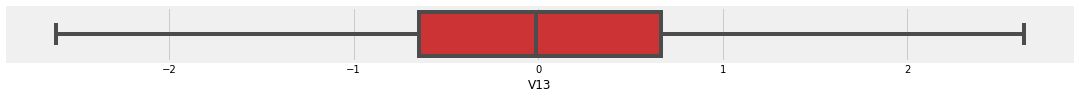

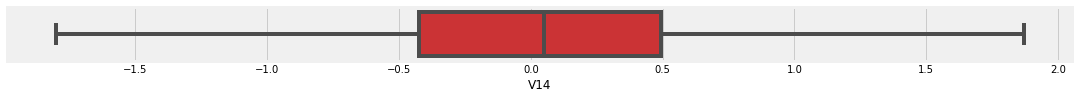

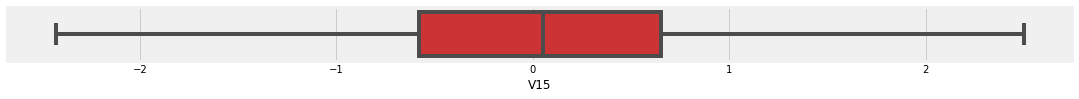

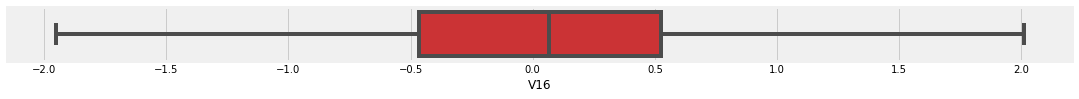

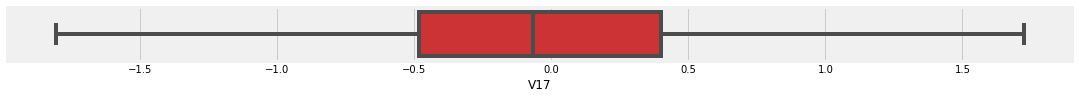

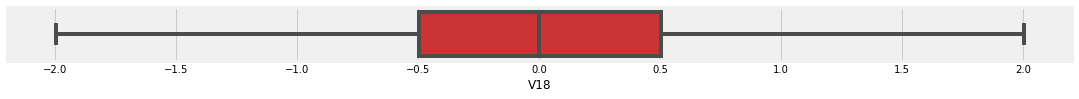

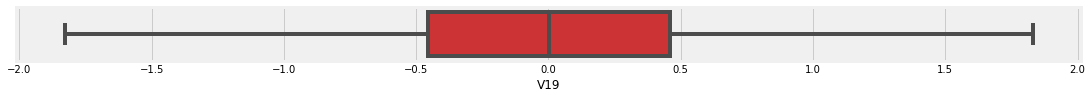

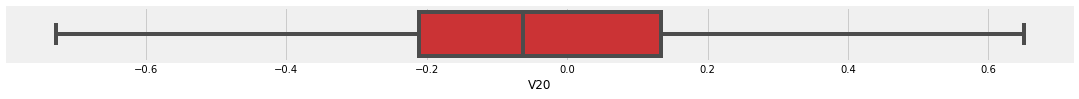

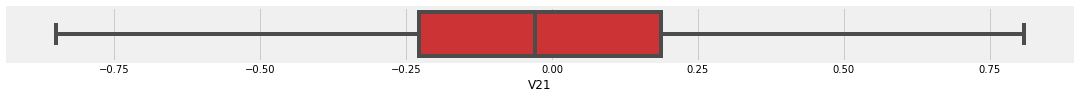

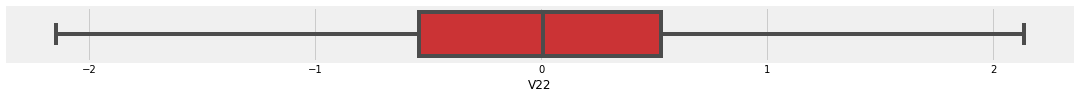

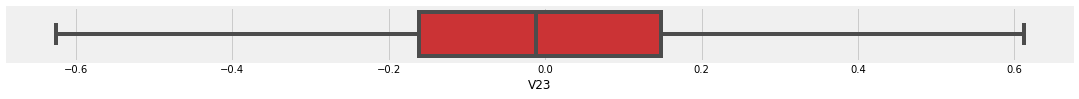

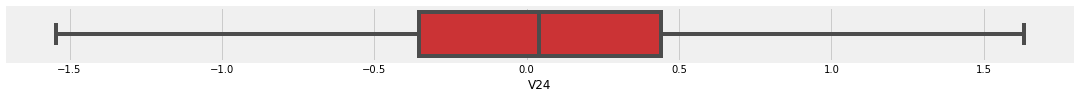

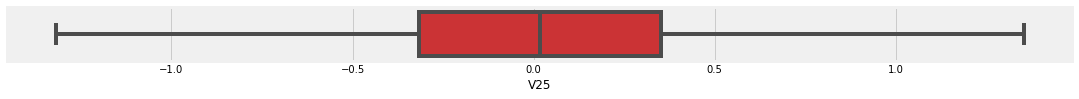

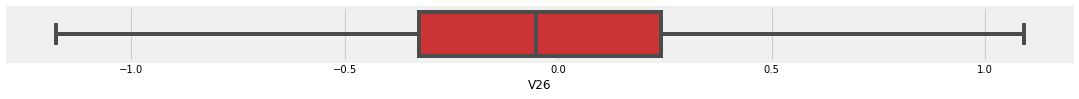

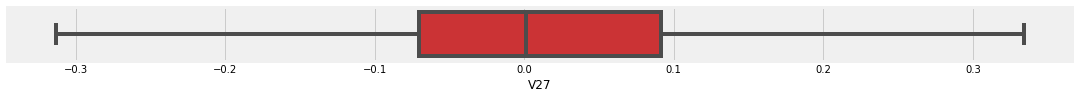

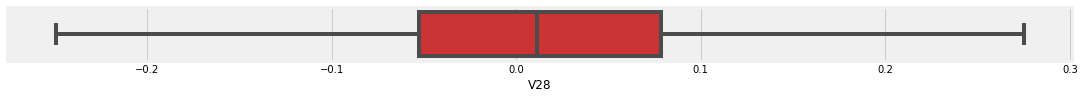

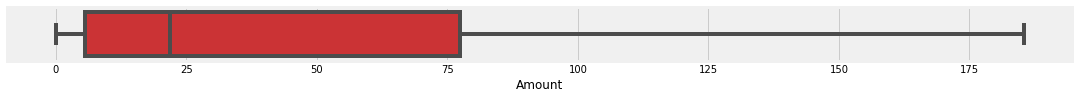

In [16]:
for cols in df2:
    q1 = df2[cols].quantile(0.25)
    q3 = df2[cols].quantile(0.75)
    iqr = q3 - q1
    whisker_width = 1.5
    lower_whisker = q1 - (whisker_width * iqr)
    upper_whisker = q3 + whisker_width * iqr
    df2[cols] = np.where(df2[cols] > upper_whisker, upper_whisker, np.where(df2[cols] < lower_whisker, lower_whisker, df2[cols]))

for col in df2:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df2, x=col,palette='Set1')

### **Combining the Clean Column in the df2 Dataframe**

In [17]:
df2["Class"] = df[["Class"]]
df2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-1.952416,1.109969,-0.121359,-1.828484,0.524980,0.247998,0.771679,0.611926,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,185.375,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990,0


### **Exploratory Data Analysis**

DataFrame Head:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-1.952416,1.109969,-0.121359,-1.828484,0.524980,0.247998,0.771679,0.611926,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,185.375,0


DataFrame Tail:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.565290,2.145527,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.880,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,1.830703,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.000,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,185.375,0


----------------------------------------------------------------------------------------------------
Missing values:


,0


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(283726, 31)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-nul

,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
Time,283726,94811.078,84692.5,47481.048,0,54204.75,84692.5,139298,172792,-0.035580,-1.293431
V1,283726,0.08,0.02,1.59,-4.264,-0.916,0.02,1.316,2.455,-0.642266,-0.062782
V2,283726,0.047,0.064,1.119,-2.701,-0.6,0.064,0.8,2.901,-0.139175,0.364571
V3,283726,0.028,0.18,1.369,-3.765,-0.89,0.18,1.027,3.902,-0.403791,-0.115836
V4,283726,-0.031,-0.022,1.309,-3.235,-0.85,-0.022,0.74,3.124,0.184786,0.155594
V5,283726,-0.002,-0.053,1.076,-2.643,-0.69,-0.053,0.612,2.565,0.228501,0.164577
V6,283726,-0.092,-0.275,1.002,-2.518,-0.769,-0.275,0.397,2.146,0.665431,0.130151
V7,283726,0.01,0.041,0.864,-2.237,-0.553,0.041,0.57,2.255,-0.060739,0.263996
V8,283726,0.068,0.022,0.484,-1.011,-0.209,0.022,0.326,1.128,0.151891,0.179904
V9,283726,-0.017,-0.053,1.018,-2.505,-0.644,-0.053,0.596,2.456,0.099859,0.065038


----------------------------------------------------------------------------------------------------
DataFrame Correlation:



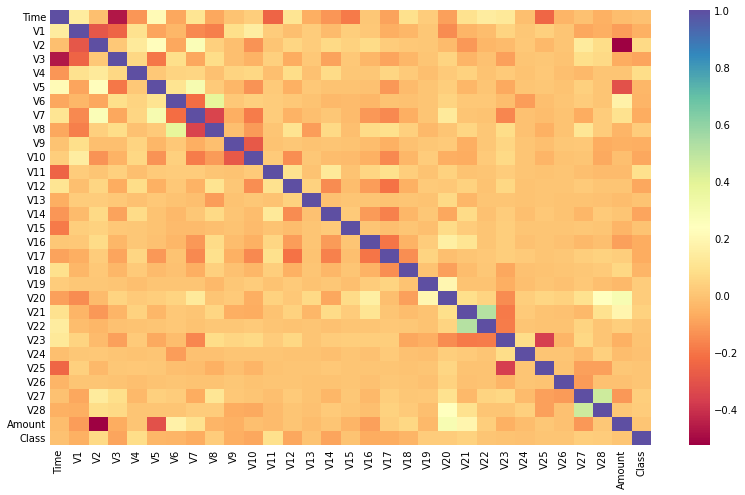

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



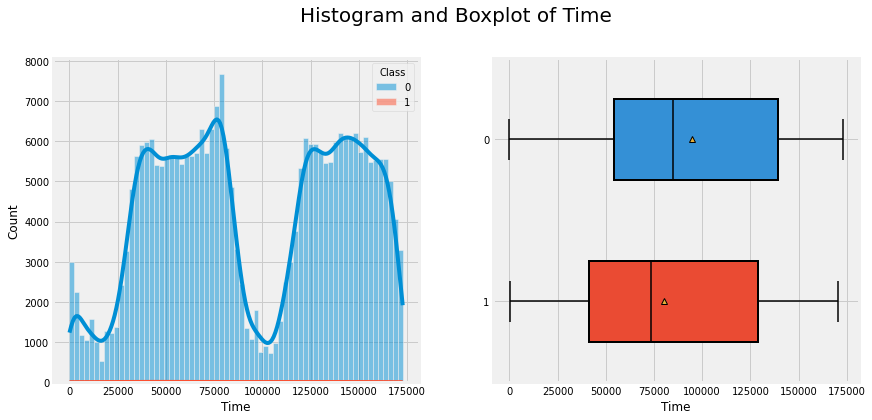

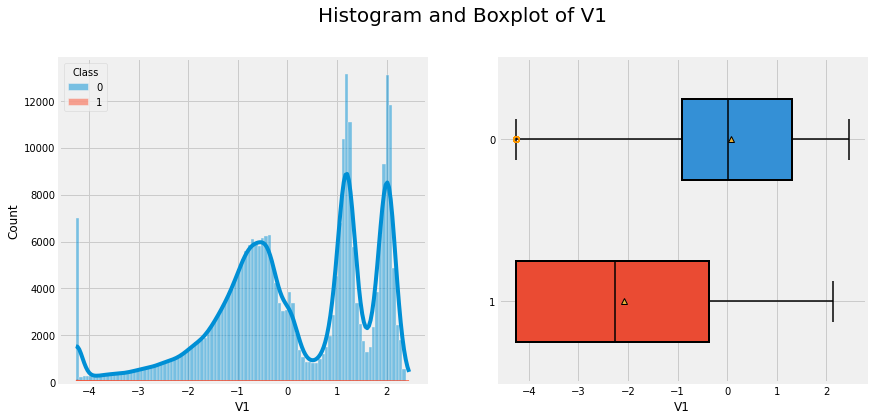

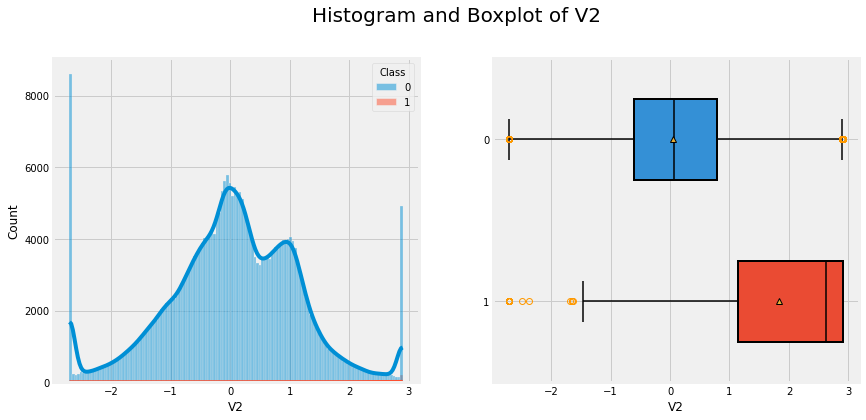

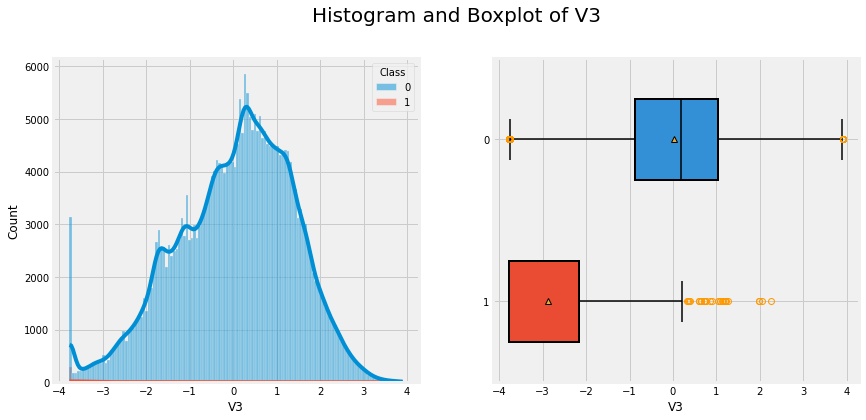

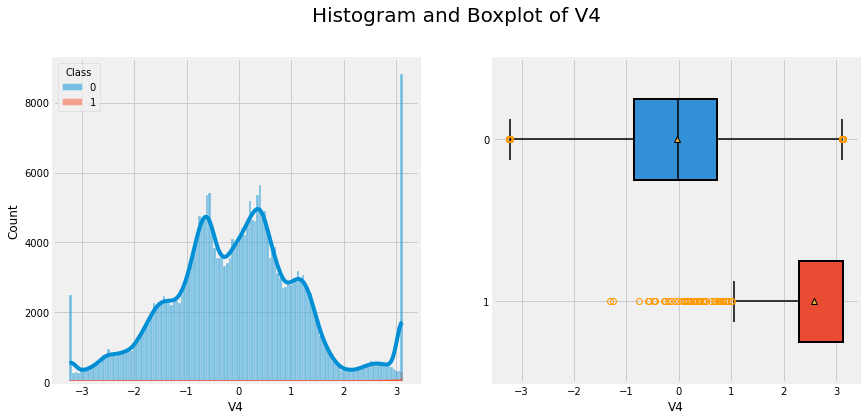

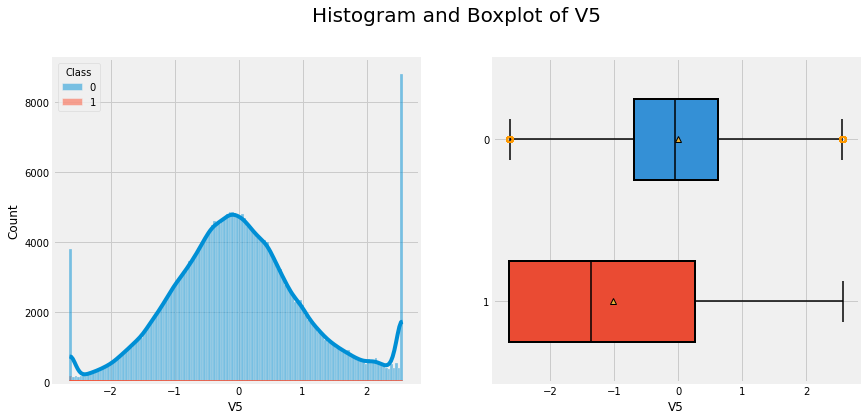

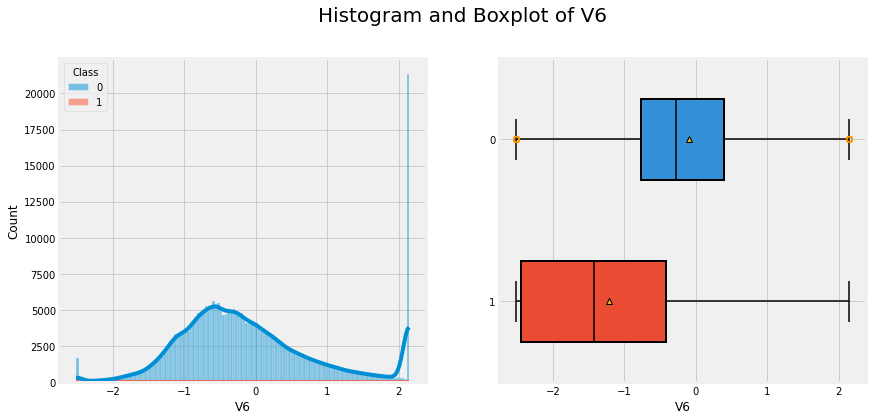

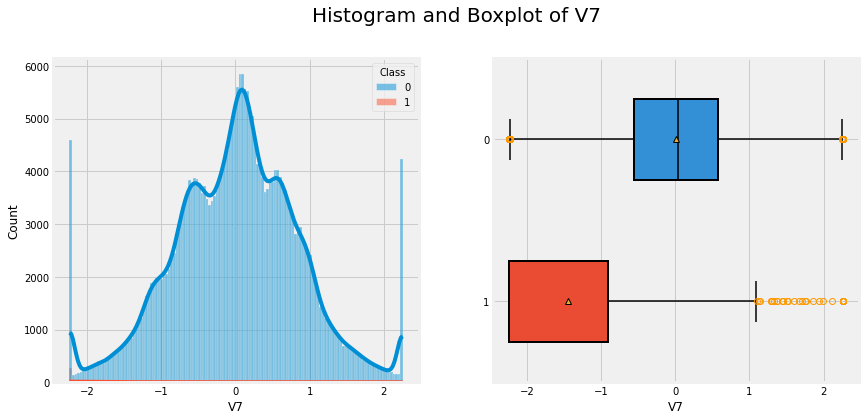

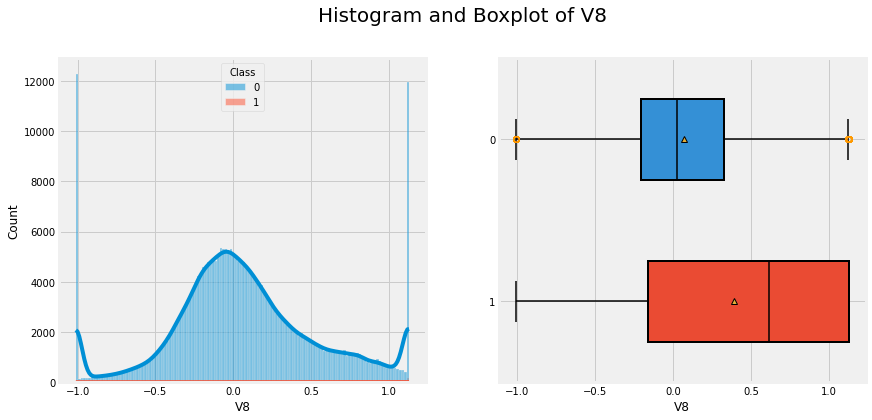

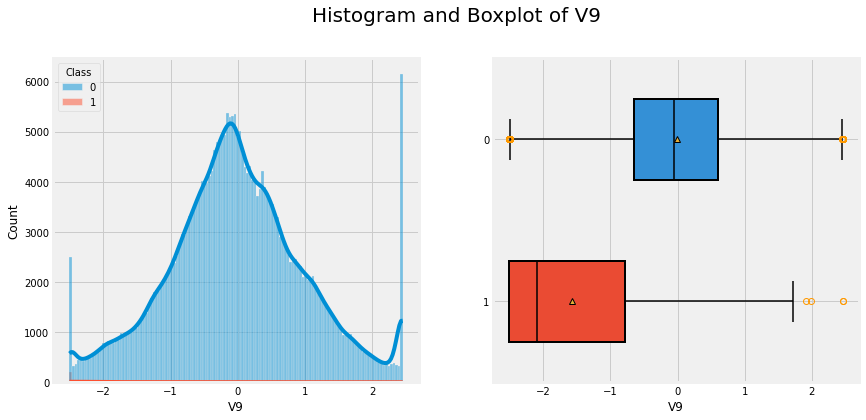

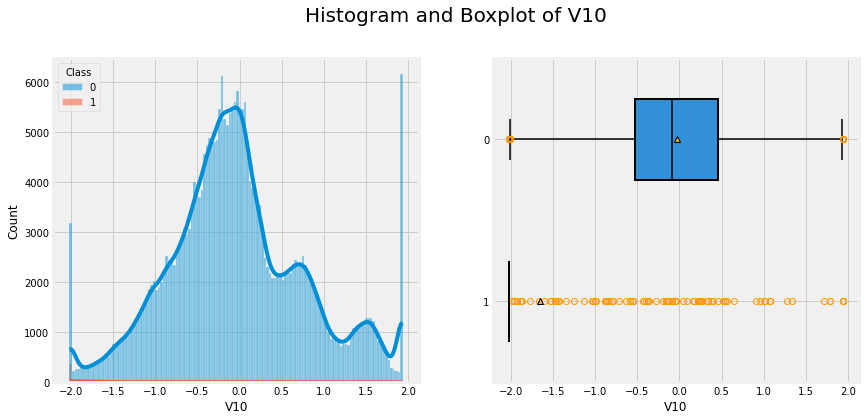

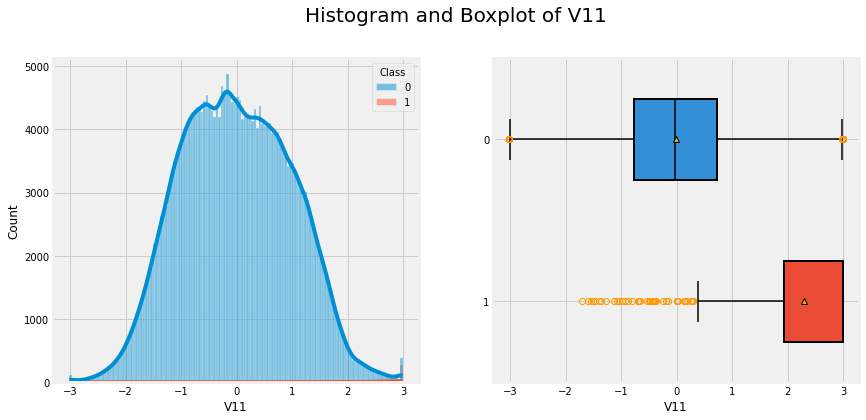

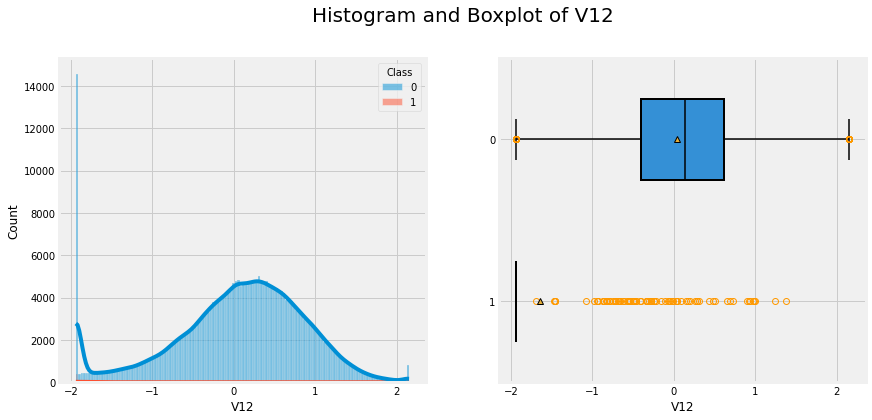

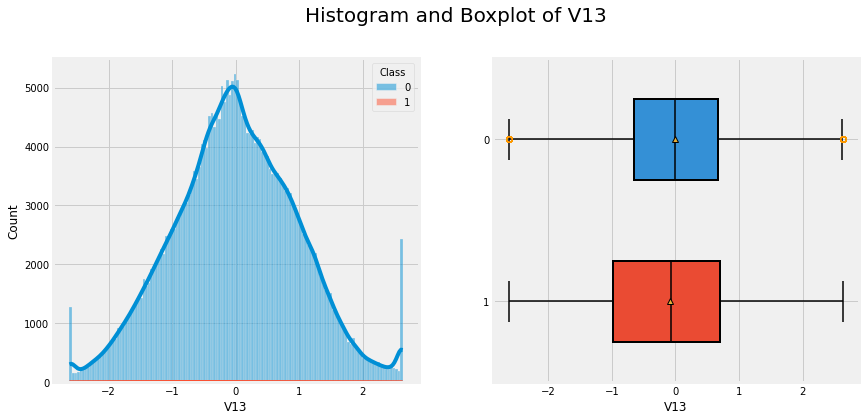

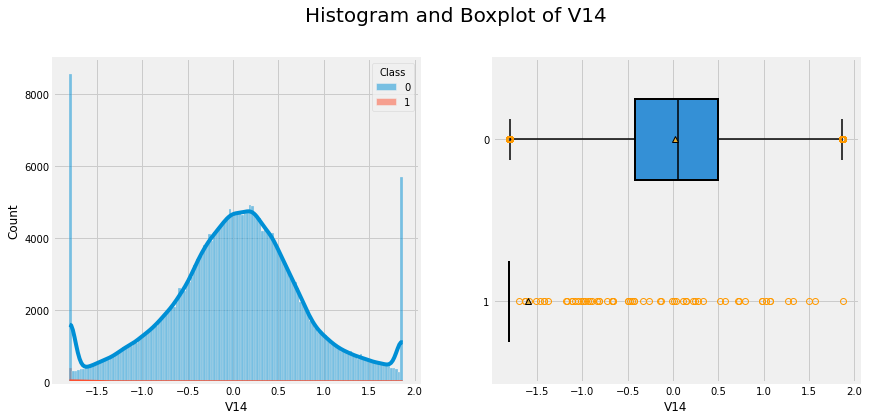

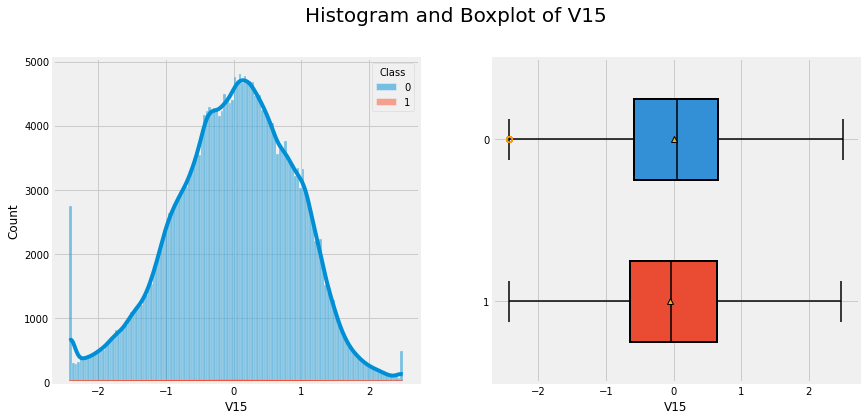

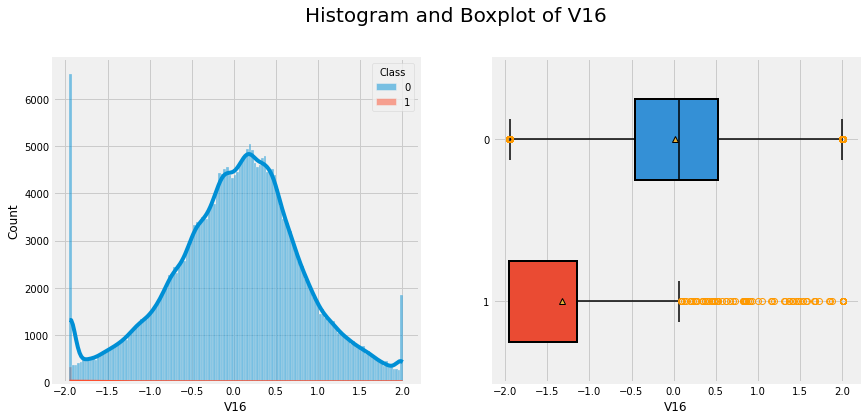

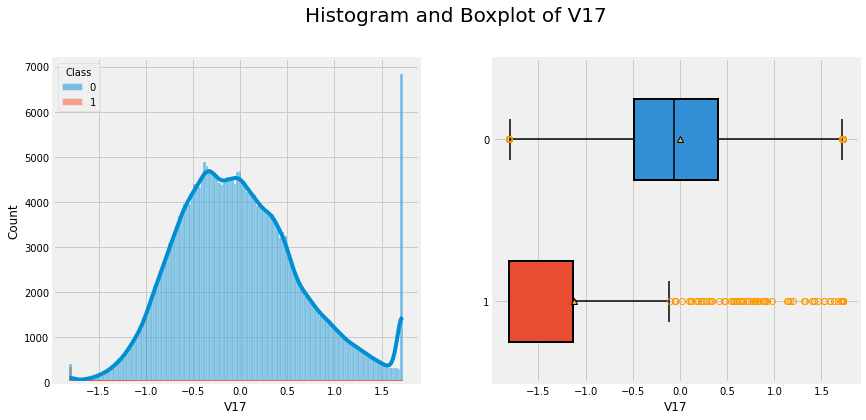

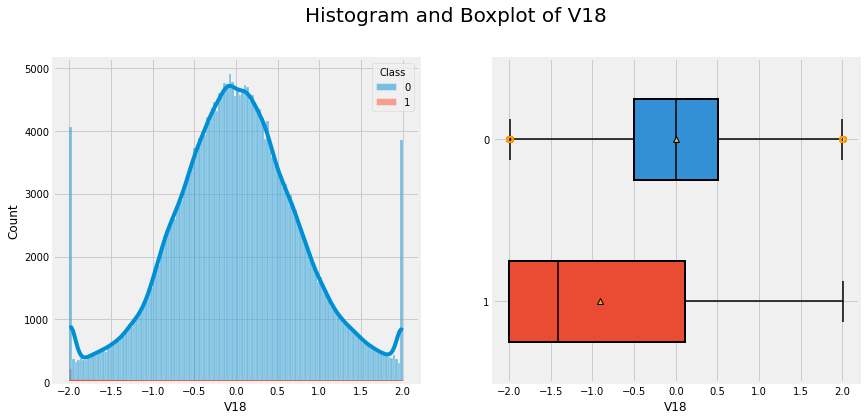

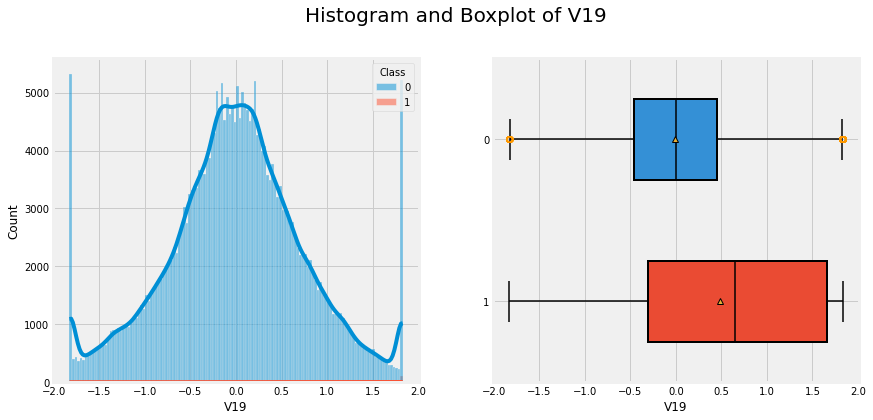

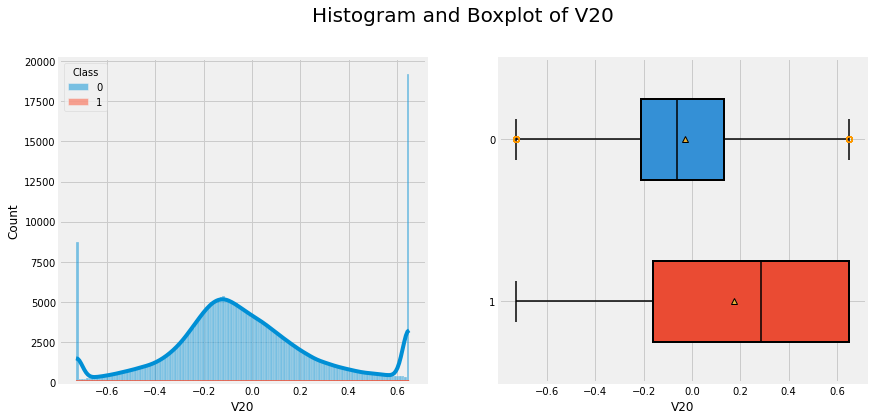

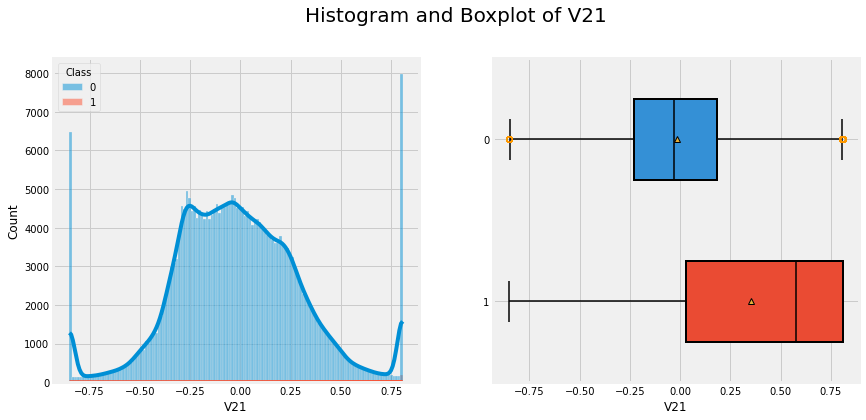

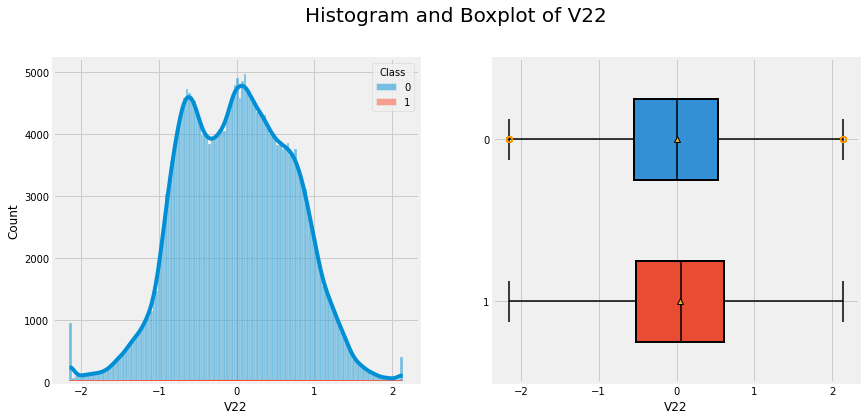

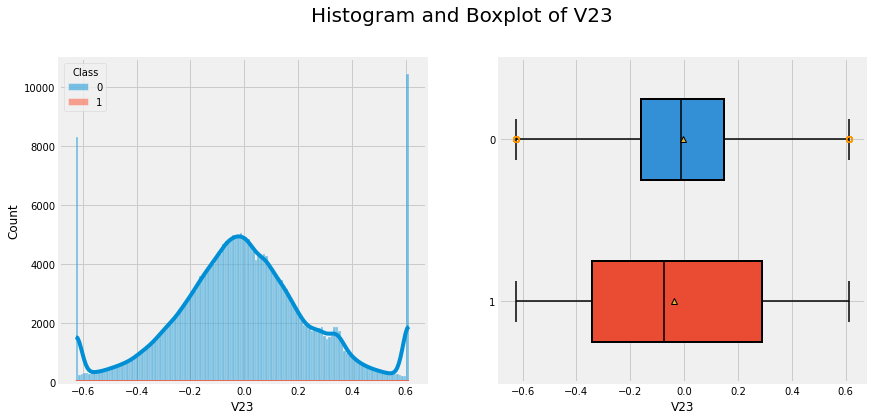

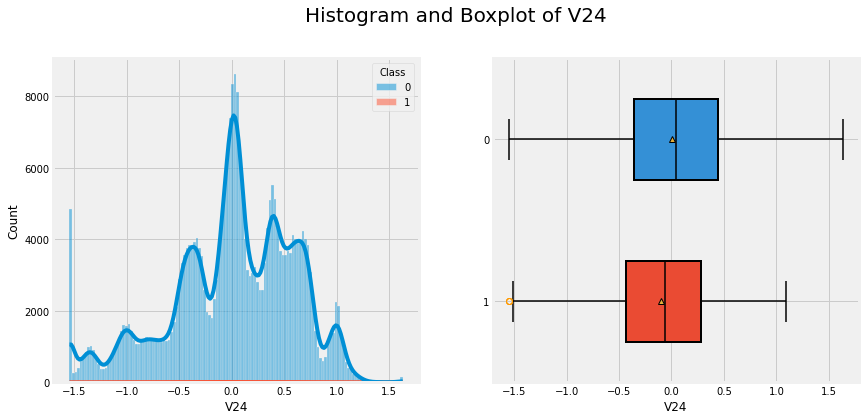

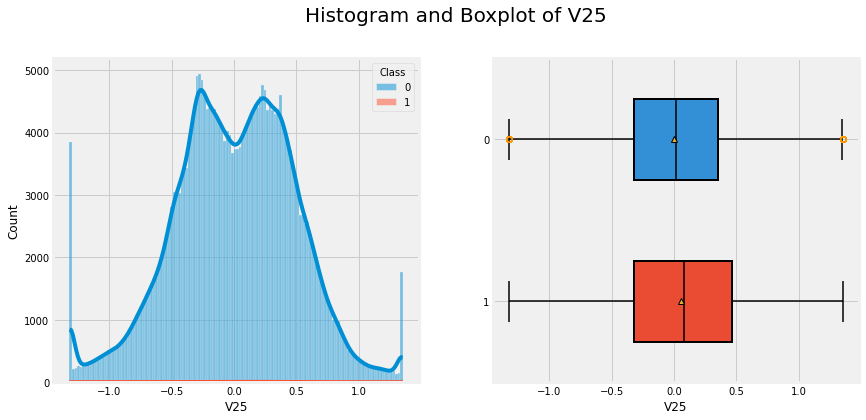

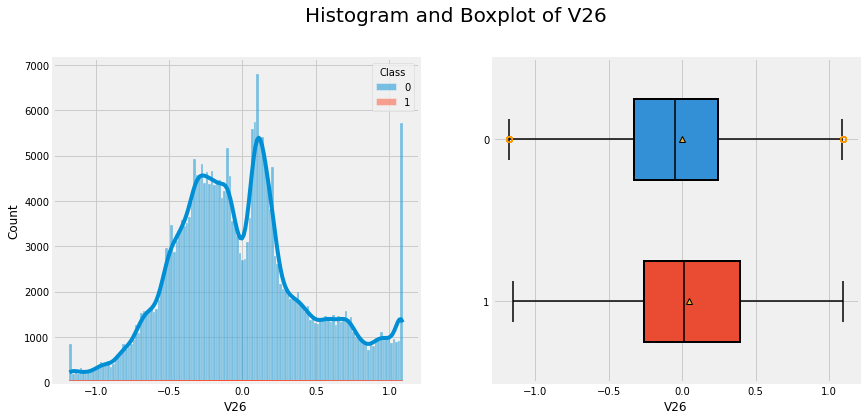

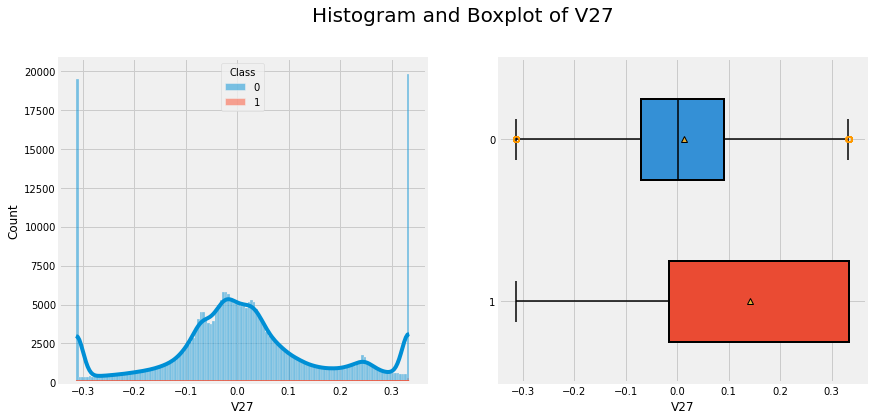

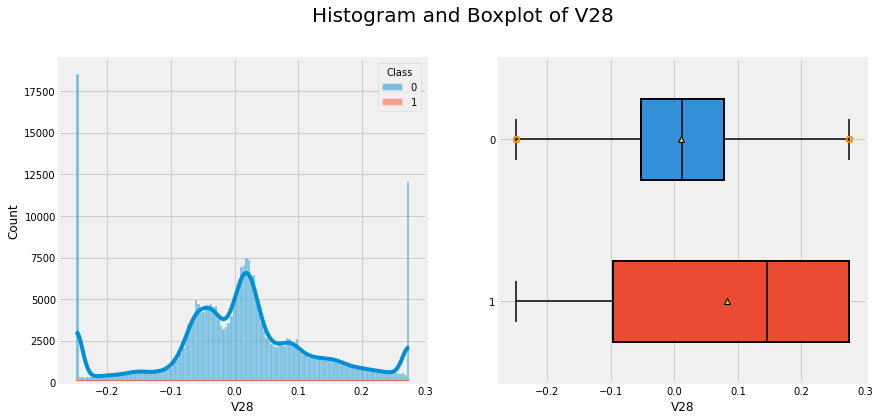

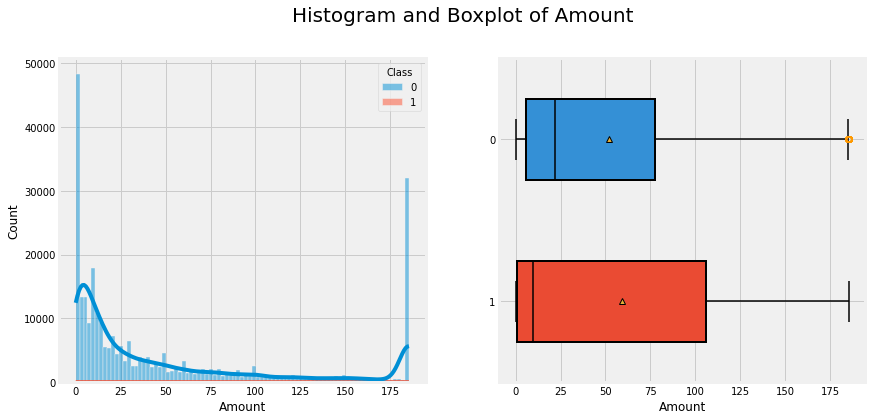

----------------------------------------------------------------------------------------------------
Countplot(s):



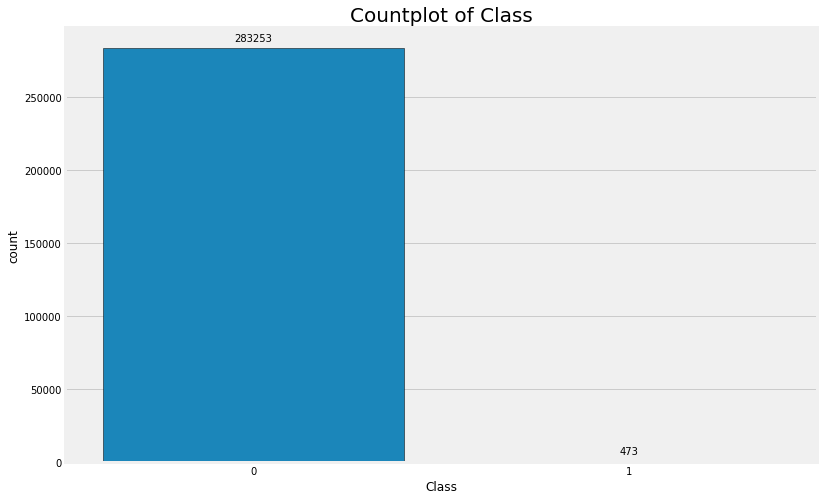

In [18]:
fast_eda(df2,target='Class')

### **Splitting the Dataset**

In [19]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop(labels=["Class"],axis=1),
    df['Class'],
    test_size = 0.25,
    random_state = 0)

In [20]:
x_train.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
194763,130747.0,2.047163,0.107987,-1.806515,0.072733,0.248371,-1.744837,0.712448,-0.488842,-0.102709,0.181618,1.631225,1.176142,-0.241013,1.040992,-0.328446,-0.673208,-0.245852,-0.331582,0.113072,-0.261380,0.241017,0.822618,0.023000,0.549868,0.322173,0.191755,-0.085025,-0.084292,0.77
135660,81344.0,1.282404,0.459864,-0.372286,0.826375,0.463568,-0.466407,0.460867,-0.186469,-0.549700,0.203961,0.787663,0.882770,0.417271,0.642625,-0.010424,0.161875,-0.835298,0.302139,0.293010,-0.096751,0.013986,0.083896,-0.247504,-0.325527,0.927293,-0.272555,-0.010168,-0.005332,1.79
259186,159004.0,-0.414863,0.012026,1.356386,1.107374,0.813456,-0.156497,-0.372675,0.031095,-0.100143,-0.158606,-1.137380,0.674799,2.027621,-0.272567,1.802644,-0.812031,0.098509,0.376851,2.958766,0.564341,-0.052272,-0.088160,0.062521,-0.680805,-0.641474,-0.159995,0.237628,0.204343,5.95
87387,61662.0,-1.432948,1.478076,0.576724,0.207540,-0.670662,-0.464572,0.221023,-0.099811,1.561896,1.511193,-0.029435,0.710931,0.088355,-0.913471,-0.376058,-0.992295,0.361036,-1.219535,-0.514430,0.266179,-0.055014,0.364330,0.154670,0.635611,-0.366314,0.163690,-0.750285,-0.275117,9.20
267282,162703.0,2.051016,-0.016765,-2.284865,0.302168,0.786895,-0.998558,0.768990,-0.464383,0.362863,-0.031401,-1.124247,0.263750,-0.036857,0.617273,-0.146163,-0.774674,-0.240874,-0.438419,0.273518,-0.139341,0.133331,0.491780,-0.119020,0.527179,0.607105,-0.090453,-0.065787,-0.062680,47.53


In [21]:
y_train.head(5)

194763    0
135660    0
259186    0
87387     0
267282    0
Name: Class, dtype: int64

In [22]:
x_train.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
194763,130747.0,2.047163,0.107987,-1.806515,0.072733,0.248371,-1.744837,0.712448,-0.488842,-0.102709,0.181618,1.631225,1.176142,-0.241013,1.040992,-0.328446,-0.673208,-0.245852,-0.331582,0.113072,-0.261380,0.241017,0.822618,0.023000,0.549868,0.322173,0.191755,-0.085025,-0.084292,0.77
135660,81344.0,1.282404,0.459864,-0.372286,0.826375,0.463568,-0.466407,0.460867,-0.186469,-0.549700,0.203961,0.787663,0.882770,0.417271,0.642625,-0.010424,0.161875,-0.835298,0.302139,0.293010,-0.096751,0.013986,0.083896,-0.247504,-0.325527,0.927293,-0.272555,-0.010168,-0.005332,1.79
259186,159004.0,-0.414863,0.012026,1.356386,1.107374,0.813456,-0.156497,-0.372675,0.031095,-0.100143,-0.158606,-1.137380,0.674799,2.027621,-0.272567,1.802644,-0.812031,0.098509,0.376851,2.958766,0.564341,-0.052272,-0.088160,0.062521,-0.680805,-0.641474,-0.159995,0.237628,0.204343,5.95
87387,61662.0,-1.432948,1.478076,0.576724,0.207540,-0.670662,-0.464572,0.221023,-0.099811,1.561896,1.511193,-0.029435,0.710931,0.088355,-0.913471,-0.376058,-0.992295,0.361036,-1.219535,-0.514430,0.266179,-0.055014,0.364330,0.154670,0.635611,-0.366314,0.163690,-0.750285,-0.275117,9.20
267282,162703.0,2.051016,-0.016765,-2.284865,0.302168,0.786895,-0.998558,0.768990,-0.464383,0.362863,-0.031401,-1.124247,0.263750,-0.036857,0.617273,-0.146163,-0.774674,-0.240874,-0.438419,0.273518,-0.139341,0.133331,0.491780,-0.119020,0.527179,0.607105,-0.090453,-0.065787,-0.062680,47.53


In [23]:
x_test.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
183484,125821.0,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,-1.644401,-1.118863,0.202647,1.145965,-1.802360,-0.247178,-0.060945,0.846606,0.379454,0.847262,0.186409,-0.207098,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,40.00
255448,157235.0,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,-1.192404,-0.854776,-0.620458,-0.806471,-0.770837,-0.108158,0.258964,0.492095,-0.148516,-0.148099,-0.096502,-0.271537,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,1.98
244749,152471.0,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,-0.219013,-1.726259,-0.736771,-1.516835,0.348343,0.041437,0.732681,-1.136766,0.816653,-1.578951,0.419835,0.701399,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,96.00
63919,50927.0,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,0.133040,1.551682,0.435125,-0.336022,0.278965,1.812232,0.080001,0.116347,0.291818,0.106228,-0.987790,0.810408,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,308.00
11475,19899.0,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,0.113386,0.664531,-3.282511,0.409266,1.252202,-0.868774,0.214387,1.878003,-1.906559,0.263854,-0.126871,-0.139436,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,5.00


### **Machine Learning Model**

In [ ]:
models={"Logistic Regression":LogisticRegression(),
        "Decision Tree":DecisionTreeClassifier(),
        "Random Forest":RandomForestClassifier(),
        "Naive Bayes":RandomForestClassifier(),
        "KNN Classifier": KNeighborsClassifier()}

for i in range(len(list(models))):
  model=list(models.values())[i]
  model.fit(x_train,y_train)

  y_train_pred=model.predict(x_train)
  y_test_pred=model.predict(x_test)

  model_train_accuracy=accuracy_score(y_train,y_train_pred)
  model_train_f1=f1_score(y_train,y_train_pred,average='weighted')
  model_train_precision=precision_score(y_train,y_train_pred)
  model_train_recall=recall_score(y_train,y_train_pred)
  model_train_rocauc_score=roc_auc_score(y_train,y_train_pred)

  model_test_accuracy=accuracy_score(y_test,y_test_pred)
  model_test_f1=f1_score(y_test,y_test_pred,average='weighted')
  model_test_precision=precision_score(y_test,y_test_pred)
  model_test_recall=recall_score(y_test,y_test_pred)
  model_test_rocauc_score=roc_auc_score(y_test,y_test_pred)

  print(list(models.keys())[i])

  print('Model performance for Training Set')
  print("-Accuracy: {:.4f}".format(model_train_accuracy))
  print("-F1 Score: {:.4f}".format(model_train_f1))
  print("-Precision: {:.4f}".format(model_train_precision))
  print("-Recall {:.4f}".format(model_train_recall))
  print("-ROC AUC Score: {:.4f}".format(model_train_rocauc_score))

  print('--------------------------------')

  print('Model performance for Testing Set')
  print("-Accuracy: {:.4f}".format(model_test_accuracy))
  print("-F1 Score: {:.4f}".format(model_test_f1))
  print("-Precision: {:.4f}".format(model_test_precision))
  print("-Recall: {:.4f}".format(model_test_recall))
  print("-ROC AUC Score: {:.4f}".format(model_test_rocauc_score))
  print('-----------------------------------------------')
  print('-----------MOVINING TO NEXT ALGO---------------')
  print('-----------------------------------------------')

Logistic Regression
Model performance for Training Set
-Accuracy: 0.9989
-F1 Score: 0.9988
-Precision: 0.6988
-Recall 0.6237
-ROC AUC Score: 0.8116
--------------------------------
Model performance for Testing Set
-Accuracy: 0.9989
-F1 Score: 0.9989
-Precision: 0.7075
-Recall: 0.6250
-ROC AUC Score: 0.8123
-----------------------------------------------
-----------MOVINING TO NEXT ALGO---------------
-----------------------------------------------
Decision Tree
Model performance for Training Set
-Accuracy: 1.0000
-F1 Score: 1.0000
-Precision: 1.0000
-Recall 1.0000
-ROC AUC Score: 1.0000
--------------------------------
Model performance for Testing Set
-Accuracy: 0.9992
-F1 Score: 0.9992
-Precision: 0.7603
-Recall: 0.7667
-ROC AUC Score: 0.8831
-----------------------------------------------
-----------MOVINING TO NEXT ALGO---------------
-----------------------------------------------
Random Forest
Model performance for Training Set
-Accuracy: 1.0000
-F1 Score: 1.0000
-Precision: 1.0

### **Prediction**

In [ ]:
x_test1=[[0, -1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,
          0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,
          -0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,
          -0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,
          -0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,
          -0.189114843888824,0.133558376740387,-0.0210530534538215,149.62]]

y_test_pred1=model.predict(x_test1)
y_test_pred1